In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [21]:
file_info = "C:\\Users\\blgai\\OneDrive\\Documents\\School\\SMU\\Courses\\Fall 2021\\Capstone A\Data\\cleaned_chunked_v1.csv"
df = pd.read_csv(file_info, sep='\t')

In [22]:
df.head()

,url,code,category,language,title,summary,key_words,content,combined,nouns,compounds,comp_nouns,flat_comp_nouns,clean_comp_nouns
0,*://BLAZINHERB.CA,200,dr,en,Blazin Herb,The Diamond High Crew,Blazin herb,Blazin Herb THC Edibles Concentrates Flower/bu...,Blazin Herb The Diamond High Crew Blazin herb ...,"[('Blazin', 0, 6, 'PROPN'), ('Herb', 7, 11, 'P...","[('Blazin Herb', 0, 11, 'COMPOUND'), ('Diamond...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...","0 {Read, Picks, DIAMOND, bud, THC, Soci...",read picks diamond bud thc social sleep appeti...
1,*://THEHONEYPOTSTORE.CA,200,dr,en,The Honey Pot Cannabis and Medical Marijuana p...,"The Honey Pot Hamilton Ontario, provides canna...","The Honey Pot ,Georgia Peach Cannabis and Medi...",The Honey Pot Home About Us F.A.Q.'s About The...,The Honey Pot Cannabis and Medical Marijuana p...,"[('Honey', 4, 9, 'PROPN'), ('Pot', 10, 13, 'PR...","[('Honey Pot Cannabis', 4, 22, 'COMPOUND'), ('...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...","0 {Read, Picks, DIAMOND, bud, THC, Soci...",read picks diamond bud thc social sleep appeti...
2,*://AMANTE.CA,200,dr,en,Amante Organics - Licensed Certified Organic C...,np-template-header-footer-from-plugin,"Organic Cannabis, Certified Organic, Weed, Org...",Amante Organics LOCAL | ORGANIC | SUSTAINABLE ...,Amante Organics - Licensed Certified Organic C...,"[('Amante', 0, 6, 'PROPN'), ('Organics', 7, 15...","[('Amante Organics -', 0, 17, 'COMPOUND'), ('O...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...","0 {Read, Picks, DIAMOND, bud, THC, Soci...",read picks diamond bud thc social sleep appeti...
3,*://CANNAFLY.CA,200,dr,en,Cannafly,Cannafly,"Marijuana, cannabis, medical marijuana, dispen...",Vancouver's Premium Mobile Medicinal Cannabis ...,"Cannafly Cannafly Marijuana, cannabis, medical...","[('Cannafly', 0, 8, 'PROPN'), ('Cannafly', 9, ...","[('marijuana legalization', 70, 92, 'COMPOUND'...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...","0 {Read, Picks, DIAMOND, bud, THC, Soci...",read picks diamond bud thc social sleep appeti...
4,*://GRON.VC,200,dr,en,Grøn Ventures,We are backing businesses and brands with pote...,"cannabis vc, cannabis venture capital, gron ve...","GRØN VENTURES 4675 MacArthur Ct, 15th Floor, N...",Grøn Ventures We are backing businesses and br...,"[('Grøn', 0, 4, 'PROPN'), ('Ventures', 5, 13, ...","[('Grøn Ventures', 0, 13, 'COMPOUND'), ('marke...","{'marijuana', 'Beach', 'Newport', 'ventures', ...","0 {Read, Picks, DIAMOND, bud, THC, Soci...",read picks diamond bud thc social sleep appeti...


In [23]:
def convert_to_string(text):
    s = str(text)
    return s

df['flat_comp_nouns'] = df.apply(lambda x: convert_to_string(x['comp_nouns']),axis=1)
df.head()

,url,code,category,language,title,summary,key_words,content,combined,nouns,compounds,comp_nouns,flat_comp_nouns,clean_comp_nouns
0,*://BLAZINHERB.CA,200,dr,en,Blazin Herb,The Diamond High Crew,Blazin herb,Blazin Herb THC Edibles Concentrates Flower/bu...,Blazin Herb The Diamond High Crew Blazin herb ...,"[('Blazin', 0, 6, 'PROPN'), ('Herb', 7, 11, 'P...","[('Blazin Herb', 0, 11, 'COMPOUND'), ('Diamond...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...",read picks diamond bud thc social sleep appeti...
1,*://THEHONEYPOTSTORE.CA,200,dr,en,The Honey Pot Cannabis and Medical Marijuana p...,"The Honey Pot Hamilton Ontario, provides canna...","The Honey Pot ,Georgia Peach Cannabis and Medi...",The Honey Pot Home About Us F.A.Q.'s About The...,The Honey Pot Cannabis and Medical Marijuana p...,"[('Honey', 4, 9, 'PROPN'), ('Pot', 10, 13, 'PR...","[('Honey Pot Cannabis', 4, 22, 'COMPOUND'), ('...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...",read picks diamond bud thc social sleep appeti...
2,*://AMANTE.CA,200,dr,en,Amante Organics - Licensed Certified Organic C...,np-template-header-footer-from-plugin,"Organic Cannabis, Certified Organic, Weed, Org...",Amante Organics LOCAL | ORGANIC | SUSTAINABLE ...,Amante Organics - Licensed Certified Organic C...,"[('Amante', 0, 6, 'PROPN'), ('Organics', 7, 15...","[('Amante Organics -', 0, 17, 'COMPOUND'), ('O...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...",read picks diamond bud thc social sleep appeti...
3,*://CANNAFLY.CA,200,dr,en,Cannafly,Cannafly,"Marijuana, cannabis, medical marijuana, dispen...",Vancouver's Premium Mobile Medicinal Cannabis ...,"Cannafly Cannafly Marijuana, cannabis, medical...","[('Cannafly', 0, 8, 'PROPN'), ('Cannafly', 9, ...","[('marijuana legalization', 70, 92, 'COMPOUND'...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...",read picks diamond bud thc social sleep appeti...
4,*://GRON.VC,200,dr,en,Grøn Ventures,We are backing businesses and brands with pote...,"cannabis vc, cannabis venture capital, gron ve...","GRØN VENTURES 4675 MacArthur Ct, 15th Floor, N...",Grøn Ventures We are backing businesses and br...,"[('Grøn', 0, 4, 'PROPN'), ('Ventures', 5, 13, ...","[('Grøn Ventures', 0, 13, 'COMPOUND'), ('marke...","{'marijuana', 'Beach', 'Newport', 'ventures', ...","{'marijuana', 'Beach', 'Newport', 'ventures', ...",read picks diamond bud thc social sleep appeti...


In [24]:
import text_normalizer as tn
import nltk
stopword_list = nltk.corpus.stopwords.words('english')
#keep negation if in any bi-grams
stopword_list.remove('no')
stopword_list.remove('not')

#normalize the corpus
norm_corpus = tn.normalize_corpus(corpus=df['flat_comp_nouns'],
                                  html_stripping=True,
                                  contraction_expansion=True,
                                  text_lemmatization=True,
                                  text_stemming=False,
                                  special_char_removal=True,
                                  remove_digits=True,
                                  stopword_removal=True,
                                  stopwords=stopword_list
                                 )
df['clean_comp_nouns'] = norm_corpus

In [25]:
df.head()

,url,code,category,language,title,summary,key_words,content,combined,nouns,compounds,comp_nouns,flat_comp_nouns,clean_comp_nouns
0,*://BLAZINHERB.CA,200,dr,en,Blazin Herb,The Diamond High Crew,Blazin herb,Blazin Herb THC Edibles Concentrates Flower/bu...,Blazin Herb The Diamond High Crew Blazin herb ...,"[('Blazin', 0, 6, 'PROPN'), ('Herb', 7, 11, 'P...","[('Blazin Herb', 0, 11, 'COMPOUND'), ('Diamond...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...",read picks diamond bud thc social sleep club r...
1,*://THEHONEYPOTSTORE.CA,200,dr,en,The Honey Pot Cannabis and Medical Marijuana p...,"The Honey Pot Hamilton Ontario, provides canna...","The Honey Pot ,Georgia Peach Cannabis and Medi...",The Honey Pot Home About Us F.A.Q.'s About The...,The Honey Pot Cannabis and Medical Marijuana p...,"[('Honey', 4, 9, 'PROPN'), ('Pot', 10, 13, 'PR...","[('Honey Pot Cannabis', 4, 22, 'COMPOUND'), ('...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...",appetite stress muscle hepatitis c hamilton hi...
2,*://AMANTE.CA,200,dr,en,Amante Organics - Licensed Certified Organic C...,np-template-header-footer-from-plugin,"Organic Cannabis, Certified Organic, Weed, Org...",Amante Organics LOCAL | ORGANIC | SUSTAINABLE ...,Amante Organics - Licensed Certified Organic C...,"[('Amante', 0, 6, 'PROPN'), ('Organics', 7, 15...","[('Amante Organics -', 0, 17, 'COMPOUND'), ('O...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...",nation rights reserved amante licensed np head...
3,*://CANNAFLY.CA,200,dr,en,Cannafly,Cannafly,"Marijuana, cannabis, medical marijuana, dispen...",Vancouver's Premium Mobile Medicinal Cannabis ...,"Cannafly Cannafly Marijuana, cannabis, medical...","[('Cannafly', 0, 8, 'PROPN'), ('Cannafly', 9, ...","[('marijuana legalization', 70, 92, 'COMPOUND'...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...",chilliwack connoisseurs thc industry death bub...
4,*://GRON.VC,200,dr,en,Grøn Ventures,We are backing businesses and brands with pote...,"cannabis vc, cannabis venture capital, gron ve...","GRØN VENTURES 4675 MacArthur Ct, 15th Floor, N...",Grøn Ventures We are backing businesses and br...,"[('Grøn', 0, 4, 'PROPN'), ('Ventures', 5, 13, ...","[('Grøn Ventures', 0, 13, 'COMPOUND'), ('marke...","{'marijuana', 'Beach', 'Newport', 'ventures', ...","{'marijuana', 'Beach', 'Newport', 'ventures', ...",marijuana beach newport venture ct ventures ma...


In [2]:
#file_out = "C:\\Users\\blgai\\OneDrive\\Documents\\School\\SMU\\Courses\\Fall 2021\\Capstone A\Data\\cleaned_chunked_v2.csv"
#df.to_csv(file_out,index=False,sep='\t')

NameError: name 'df' is not defined

In [5]:
file_info = "C:\\Users\\blgai\\OneDrive\\Documents\\School\\SMU\\Courses\\Fall 2021\\Capstone A\Data\\cleaned_chunked_v2.csv"
df = pd.read_csv(file_info, sep='\t')

In [6]:
df.head()

,url,code,category,language,title,summary,key_words,content,combined,nouns,compounds,comp_nouns,flat_comp_nouns,clean_comp_nouns
0,*://BLAZINHERB.CA,200,dr,en,Blazin Herb,The Diamond High Crew,Blazin herb,Blazin Herb THC Edibles Concentrates Flower/bu...,Blazin Herb The Diamond High Crew Blazin herb ...,"[('Blazin', 0, 6, 'PROPN'), ('Herb', 7, 11, 'P...","[('Blazin Herb', 0, 11, 'COMPOUND'), ('Diamond...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...",read picks diamond bud thc social sleep club r...
1,*://THEHONEYPOTSTORE.CA,200,dr,en,The Honey Pot Cannabis and Medical Marijuana p...,"The Honey Pot Hamilton Ontario, provides canna...","The Honey Pot ,Georgia Peach Cannabis and Medi...",The Honey Pot Home About Us F.A.Q.'s About The...,The Honey Pot Cannabis and Medical Marijuana p...,"[('Honey', 4, 9, 'PROPN'), ('Pot', 10, 13, 'PR...","[('Honey Pot Cannabis', 4, 22, 'COMPOUND'), ('...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...",appetite stress muscle hepatitis c hamilton hi...
2,*://AMANTE.CA,200,dr,en,Amante Organics - Licensed Certified Organic C...,np-template-header-footer-from-plugin,"Organic Cannabis, Certified Organic, Weed, Org...",Amante Organics LOCAL | ORGANIC | SUSTAINABLE ...,Amante Organics - Licensed Certified Organic C...,"[('Amante', 0, 6, 'PROPN'), ('Organics', 7, 15...","[('Amante Organics -', 0, 17, 'COMPOUND'), ('O...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...",nation rights reserved amante licensed np head...
3,*://CANNAFLY.CA,200,dr,en,Cannafly,Cannafly,"Marijuana, cannabis, medical marijuana, dispen...",Vancouver's Premium Mobile Medicinal Cannabis ...,"Cannafly Cannafly Marijuana, cannabis, medical...","[('Cannafly', 0, 8, 'PROPN'), ('Cannafly', 9, ...","[('marijuana legalization', 70, 92, 'COMPOUND'...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...",chilliwack connoisseurs thc industry death bub...
4,*://GRON.VC,200,dr,en,Grøn Ventures,We are backing businesses and brands with pote...,"cannabis vc, cannabis venture capital, gron ve...","GRØN VENTURES 4675 MacArthur Ct, 15th Floor, N...",Grøn Ventures We are backing businesses and br...,"[('Grøn', 0, 4, 'PROPN'), ('Ventures', 5, 13, ...","[('Grøn Ventures', 0, 13, 'COMPOUND'), ('marke...","{'marijuana', 'Beach', 'Newport', 'ventures', ...","{'marijuana', 'Beach', 'Newport', 'ventures', ...",marijuana beach newport venture ct ventures ma...


In [7]:
df.groupby(df.category).size()

category
bu    11731
dr     1595
ed     3894
mk     8775
os     6789
sp     2535
sx     6557
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
#get 10% holdout set
train_corpus, holdout_corpus, train_label, holdout_label = train_test_split(np.array(df['clean_comp_nouns']), 
                                                                            np.array(df['category']),
                                                                           test_size=.10,random_state=1234)

#get 80% train and 20% test sets
train_corpus, test_corpus, train_label, test_label = train_test_split(train_corpus,
                                                                      train_label,
                                                                      test_size=.2225,random_state=1234) #.9 * .2225 = .20

train_corpus.shape, test_corpus.shape, holdout_corpus.shape

((29302,), (8386,), (4188,))

In [9]:
from collections import Counter
trd = dict(Counter(train_label))
tsd = dict(Counter(test_label))
tvd = dict(Counter(holdout_label))

(pd.DataFrame([[key,trd[key],tsd[key],tvd[key]] for key in trd],columns=['Target Label','Train Count','Test Count','Holdout Count']).sort_values(by=['Train Count','Test Count','Holdout Count'],ascending=False))

,Target Label,Train Count,Test Count,Holdout Count
2,bu,8187,2355,1189
0,mk,6177,1709,889
1,os,4743,1393,653
5,sx,4544,1345,668
6,ed,2723,783,388
4,sp,1783,494,258
3,dr,1145,307,143


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

#build BOW features on train corpus
tv = TfidfVectorizer(use_idf=True, min_df=0.0,max_df=1.0, norm="l2",smooth_idf=True)
tv_train_features = tv.fit_transform(train_corpus)
#transform test corpus into features
tv_test_features = tv.transform(test_corpus)
#transform holdout corpus into features
tv_holdout_features = tv.transform(holdout_corpus)

print('TFIDF model:> Train features shape:',tv_train_features.shape,'Test features shape:',tv_test_features.shape,'Holdout features shape:',tv_holdout_features.shape)

TFIDF model:> Train features shape: (29302, 344693) Test features shape: (8386, 344693) Holdout features shape: (4188, 344693)


In [11]:
#SVM
from sklearn.svm import LinearSVC

svm = LinearSVC(penalty='l2',C=1,random_state=1234)
svm.fit(tv_train_features,train_label)

LinearSVC(C=1, random_state=1234)

In [12]:
svm_tfidf_cv_scores = cross_val_score(svm,tv_train_features,train_label,cv=5)

In [13]:
svm_tfidf_cv_mean_score = np.mean(svm_tfidf_cv_scores)

In [14]:
print('CV Accuracy (5-fold):',svm_tfidf_cv_scores)
print('Mean CV Accuracy:',svm_tfidf_cv_mean_score)

CV Accuracy (5-fold): [0.85309674 0.85224364 0.85392491 0.85921502 0.85102389]
Mean CV Accuracy: 0.8539008416250649


In [15]:
svm_tfidf_test_score = svm.score(tv_test_features,test_label)
print('Test Accuracy:',svm_tfidf_test_score)

Test Accuracy: 0.8603625089434772


In [16]:
import model_evaluation_utils as meu
svm_predictions = svm.predict(tv_test_features)
meu.get_metrics(true_labels=test_label,predicted_labels=svm_predictions)

Accuracy: 0.8604
Precision: 0.8613
Recall: 0.8604
F1 Score: 0.8606


In [17]:
unique_classes = list(set(test_label))
meu.display_classification_report(true_labels=test_label,predicted_labels=svm_predictions,classes=unique_classes)

              precision    recall  f1-score   support

          bu       0.84      0.87      0.86      2355
          os       0.83      0.80      0.82      1393
          sp       0.92      0.88      0.90       494
          sx       0.99      0.99      0.99      1345
          dr       0.99      0.94      0.97       307
          mk       0.75      0.77      0.76      1709
          ed       0.90      0.88      0.89       783

    accuracy                           0.86      8386
   macro avg       0.89      0.88      0.88      8386
weighted avg       0.86      0.86      0.86      8386



In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_label,svm_predictions,labels=['os','ed','dr','sp','mk','sx','bu'])

array([[1110,   20,    2,    8,  163,    5,   85],
       [   7,  690,    0,    7,   26,    0,   53],
       [   5,    1,  290,    0,    7,    0,    4],
       [  14,    5,    0,  437,   29,    2,    7],
       [ 122,   27,    0,   21, 1309,    1,  229],
       [   3,    0,    0,    0,    4, 1335,    3],
       [  69,   27,    0,    2,  211,    2, 2044]], dtype=int64)

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[1110   20    2    8  163    5   85]
 [   7  690    0    7   26    0   53]
 [   5    1  290    0    7    0    4]
 [  14    5    0  437   29    2    7]
 [ 122   27    0   21 1309    1  229]
 [   3    0    0    0    4 1335    3]
 [  69   27    0    2  211    2 2044]]


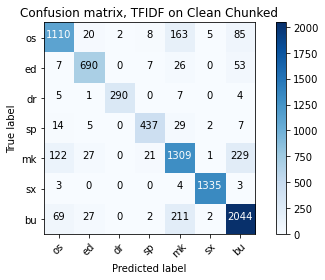

In [20]:
cnf_matrix = confusion_matrix(test_label,svm_predictions,labels=['os','ed','dr','sp','mk','sx','bu'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['os','ed','dr','sp','mk','sx','bu'],
                      title='Confusion matrix, TFIDF on Clean Chunked')

In [87]:
#Let's try feature reduction

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_opt=SelectKBest(chi2, k=1000)
tv_train_features_trimmed = X_opt.fit_transform(tv_train_features, train_label)
tv_train_features_trimmed.shape

(29302, 1000)

In [88]:
#create a data frame that includes all features and whether or not they are deemed important by feature_selection
feat_imp = pd.DataFrame(list(zip(tv.get_feature_names(),X_opt.get_support().tolist())),columns = ['Features','Important'])
feat_imp

,Features,Important
0,aa,False
1,aaa,False
2,aaaa,False
3,aaaaa,False
4,aaaaaa,False
...,...,...
344688,zzvids,False
344689,zzz,False
344690,zzzatarhan,False
344691,zzzs,False


In [89]:
#Now we can grab the important features so that we can select only the important features from the sparse matrix created by TfidfVectorizer
imp_Feats_array = np.array(feat_imp[feat_imp.Important == True].index)

In [90]:
#Now we can pull only the important features out of the original train, test, and holdout matrices
tv_train_features_sub = tv_train_features[:,imp_Feats_array]
tv_test_features_sub = tv_test_features[:,imp_Feats_array]
tv_holdout_features_sub = tv_holdout_features[:,imp_Feats_array]

#Examine the new shapes of the sub-selected features
print('TFIDF model:> Train features shape:',tv_train_features_sub.shape,'Test features shape:',tv_test_features_sub.shape,'Holdout features shape:',tv_holdout_features_sub.shape)

TFIDF model:> Train features shape: (29302, 1000) Test features shape: (8386, 1000) Holdout features shape: (4188, 1000)


In [91]:
#SVM
from sklearn.svm import LinearSVC

svm = LinearSVC(penalty='l2',C=1,random_state=1234)
svm.fit(tv_train_features_sub,train_label)

LinearSVC(C=1, random_state=1234)

In [92]:
svm_tfidf_cv_scores = cross_val_score(svm,tv_train_features_sub,train_label,cv=5)

In [93]:
svm_tfidf_cv_mean_score = np.mean(svm_tfidf_cv_scores)

In [94]:
print('CV Accuracy (5-fold):',svm_tfidf_cv_scores)
print('Mean CV Accuracy:',svm_tfidf_cv_mean_score)

CV Accuracy (5-fold): [0.83 0.83 0.83 0.84 0.83]
Mean CV Accuracy: 0.8344483259213881


In [95]:
svm_tfidf_test_score = svm.score(tv_test_features_sub,test_label)
print('Test Accuracy:',svm_tfidf_test_score)

Test Accuracy: 0.8433102790364894


In [96]:
import model_evaluation_utils as meu
svm_predictions = svm.predict(tv_test_features_sub)
meu.get_metrics(true_labels=test_label,predicted_labels=svm_predictions)

Accuracy: 0.8433
Precision: 0.8456
Recall: 0.8433
F1 Score: 0.8439


In [97]:
unique_classes = list(set(test_label))
meu.display_classification_report(true_labels=test_label,predicted_labels=svm_predictions,classes=unique_classes)

              precision    recall  f1-score   support

          bu       0.82      0.86      0.84      2355
          os       0.83      0.78      0.81      1393
          sp       0.90      0.86      0.88       494
          sx       0.99      0.99      0.99      1345
          dr       0.99      0.91      0.95       307
          mk       0.71      0.74      0.72      1709
          ed       0.90      0.84      0.87       783

    accuracy                           0.84      8386
   macro avg       0.88      0.85      0.87      8386
weighted avg       0.85      0.84      0.84      8386



Confusion matrix, without normalization
[[1091   18    2    9  180    4   89]
 [   6  661    0   10   42    1   63]
 [  14    1  279    0    6    2    5]
 [  12   10    0  424   38    1    9]
 [ 121   20    1   21 1259    1  286]
 [   2    0    0    1    8 1330    4]
 [  61   22    1    6  235    2 2028]]


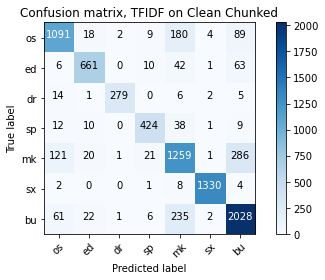

In [98]:
cnf_matrix = confusion_matrix(test_label,svm_predictions,labels=['os','ed','dr','sp','mk','sx','bu'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['os','ed','dr','sp','mk','sx','bu'],
                      title='Confusion matrix, TFIDF on Clean Chunked')

In [100]:
feat_imp[feat_imp.Important == True]

,Features,Important
1331,academic,True
1345,academics,True
1352,academy,True
1558,accessories,True
1583,accessory,True
...,...,...
340724,yield,True
340909,yo,True
341278,young,True
341545,youth,True


In [102]:
df.head(10)

,url,code,category,language,title,summary,key_words,content,combined,nouns,compounds,comp_nouns,flat_comp_nouns,clean_comp_nouns
0,*://BLAZINHERB.CA,200,dr,en,Blazin Herb,The Diamond High Crew,Blazin herb,Blazin Herb THC Edibles Concentrates Flower/bu...,Blazin Herb The Diamond High Crew Blazin herb ...,"[('Blazin', 0, 6, 'PROPN'), ('Herb', 7, 11, 'P...","[('Blazin Herb', 0, 11, 'COMPOUND'), ('Diamond...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...",read picks diamond bud thc social sleep club r...
1,*://THEHONEYPOTSTORE.CA,200,dr,en,The Honey Pot Cannabis and Medical Marijuana p...,"The Honey Pot Hamilton Ontario, provides canna...","The Honey Pot ,Georgia Peach Cannabis and Medi...",The Honey Pot Home About Us F.A.Q.'s About The...,The Honey Pot Cannabis and Medical Marijuana p...,"[('Honey', 4, 9, 'PROPN'), ('Pot', 10, 13, 'PR...","[('Honey Pot Cannabis', 4, 22, 'COMPOUND'), ('...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...",appetite stress muscle hepatitis c hamilton hi...
2,*://AMANTE.CA,200,dr,en,Amante Organics - Licensed Certified Organic C...,np-template-header-footer-from-plugin,"Organic Cannabis, Certified Organic, Weed, Org...",Amante Organics LOCAL | ORGANIC | SUSTAINABLE ...,Amante Organics - Licensed Certified Organic C...,"[('Amante', 0, 6, 'PROPN'), ('Organics', 7, 15...","[('Amante Organics -', 0, 17, 'COMPOUND'), ('O...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...",nation rights reserved amante licensed np head...
3,*://CANNAFLY.CA,200,dr,en,Cannafly,Cannafly,"Marijuana, cannabis, medical marijuana, dispen...",Vancouver's Premium Mobile Medicinal Cannabis ...,"Cannafly Cannafly Marijuana, cannabis, medical...","[('Cannafly', 0, 8, 'PROPN'), ('Cannafly', 9, ...","[('marijuana legalization', 70, 92, 'COMPOUND'...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...",chilliwack connoisseurs thc industry death bub...
4,*://GRON.VC,200,dr,en,Grøn Ventures,We are backing businesses and brands with pote...,"cannabis vc, cannabis venture capital, gron ve...","GRØN VENTURES 4675 MacArthur Ct, 15th Floor, N...",Grøn Ventures We are backing businesses and br...,"[('Grøn', 0, 4, 'PROPN'), ('Ventures', 5, 13, ...","[('Grøn Ventures', 0, 13, 'COMPOUND'), ('marke...","{'marijuana', 'Beach', 'Newport', 'ventures', ...","{'marijuana', 'Beach', 'Newport', 'ventures', ...",marijuana beach newport venture ct ventures ma...
5,*://NATO-ALPHABET.DE,200,ed,en,ICAO/NATO/ITU Phonetic Alphabet Mnemonics,Mnemonics for learning the NATO Phonetic Alphabet,"ICAO, NATO, ITU, Phonetic, Alphabet, Emoji, Mn...",ICAO/NATO/ITU Phonetic Alphabet Emoji Mnemonic...,ICAO/NATO/ITU Phonetic Alphabet Mnemonics Mnem...,"[('ICAO', 0, 4, 'PROPN'), ('NATO', 5, 9, 'PROP...","[('ITU Phonetic Alphabet Mnemonics Mnemonics',...","{'NATO Phonetic Alphabet ICAO', 'Whiskey Whisk...","{'NATO Phonetic Alphabet ICAO', 'Whiskey Whisk...",nato phonetic alphabet icao whiskey whiskey si...
6,*://ROSLYNHERBS.ONLINE,200,dr,en,ROSLYN HERBS 21+ CANNABIS,Roslyn Herbs is a recreational cannabis retail...,"marijuana, cannabis, Roslyn, weed, pot, I-502,...",Home Menu PARTNERS NEWS CONTACT Are you over 2...,ROSLYN HERBS 21+ CANNABIS Roslyn Herbs is a re...,"[('HERBS', 7, 12, 'PROPN'), ('+', 15, 16, 'PRO...","[('CANNABIS Roslyn Herbs', 17, 38, 'COMPOUND')...","{'+', 'WA', 'marijuana', 'pot', 'CONTACT', 'CA...","{'+', 'WA', 'marijuana', 'pot', 'CONTACT', 'CA...",wa marijuana pot contact cannabis roslyn herbs...
7,*://MARIYJUANA.ORG,200,dr,en,Mari y Juana,Latino Culture within the Cannabis & Hemp indu...,"CBD, THC, CBD THC Ratio, Xhicana leading the c...",Home PodCast Events Shop Mari y Juana Mari y J...,Mari y Juana Latino Culture within the Cannabi...,"[('Mari', 0, 4, 'PROPN'), ('y', 5, 6, 'PROPN')...","[('Mari y Juana Latino Culture', 0, 27, 'COMPO..

In [ ]:
#TODO:  sparse random projection (sklearn) for feature dimension reduction through feature projection